In [1]:
import sys
sys.path.insert(0, '../../')  
import math
import numpy as np
import matplotlib.pyplot as plt 
from gasp import process_data_for_gasp, train_gasp, run_gasp, simulate_ssfp, responses, simulation

In [2]:

def normalize(x):
    return x / np.max(x)

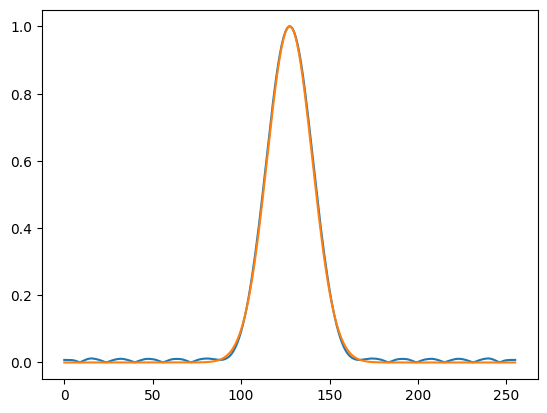

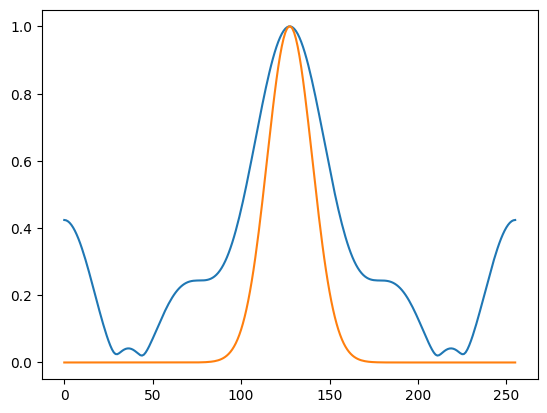

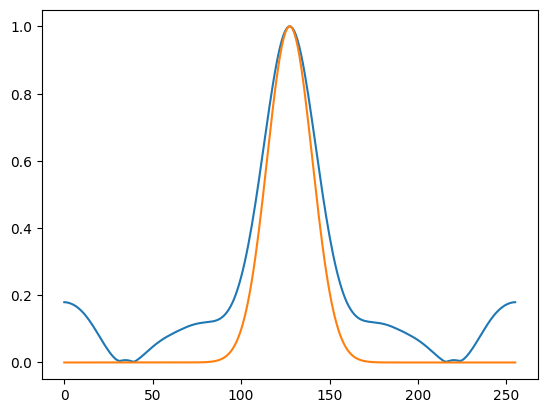

In [3]:
# Simulate ssfp with tissue phantom 
M1 = simulate_ssfp(width = 256, height = 1, npcs = 12, TRs = [3e-3, 6e-3, 12e-3], alpha = np.deg2rad(10), gradient = 2 * np.pi, phantom_type='line-muscle', phantom_padding=0)
M2 = simulate_ssfp(width = 256, height = 1, npcs = 12, TRs = [3e-3, 6e-3, 12e-3], alpha = np.deg2rad(30), gradient = 2 * np.pi, phantom_type='line-muscle', phantom_padding=0)
M3 = simulate_ssfp(width = 256, height = 1, npcs = 12, TRs = [3e-3, 6e-3, 12e-3], alpha = np.deg2rad(90), gradient = 2 * np.pi, phantom_type='line-muscle', phantom_padding=0)
D1 = responses.gaussian(width=256, bw=0.2, shift=0.-2)

# Train gasp model coefficients
method = 'affine'
Ic1, An1 = train_gasp(process_data_for_gasp(M1)[0], D1, method=method)
Ic2, An2 = train_gasp(process_data_for_gasp(M2)[0], D1, method=method)
Ic3, An3 = train_gasp(process_data_for_gasp(M3)[0], D1, method=method)

Ic4 = run_gasp(M3, An1, method=method)
Ic5 = run_gasp(M3, (An1+An2+An3)/3, method=method)

# Plot results
plt.plot(np.abs(normalize(Ic1)).T)
plt.plot(D1)
plt.show()
plt.plot(np.abs(normalize(Ic4)).T)
plt.plot(D1)
plt.show()
plt.plot(np.abs(normalize(Ic5)).T)
plt.plot(D1)
plt.show()

In [4]:
def view_gasp_comparison(G, D, ylim = 1):
    G = np.abs(G)
    length = len(G)

    f = plt.figure(figsize=(20,6))
    for i in range(length):
        ax = f.add_subplot(2, 8, i+1)
        ax2 = f.add_subplot(2, 8, 8 + i+1)

        g = G[i]
        d = D[i]
        ax.imshow(g, cmap='gray')
        ax.axis('off')
        ax2.plot(np.abs(g[int(g.shape[0]/2), :]), label='Simulated Profile')
        ax2.plot(d, '--', label='Desired Profile')
        ax2.set_ylim([0, ylim])
        if i != 0:
            ax2.yaxis.set_visible(False) 

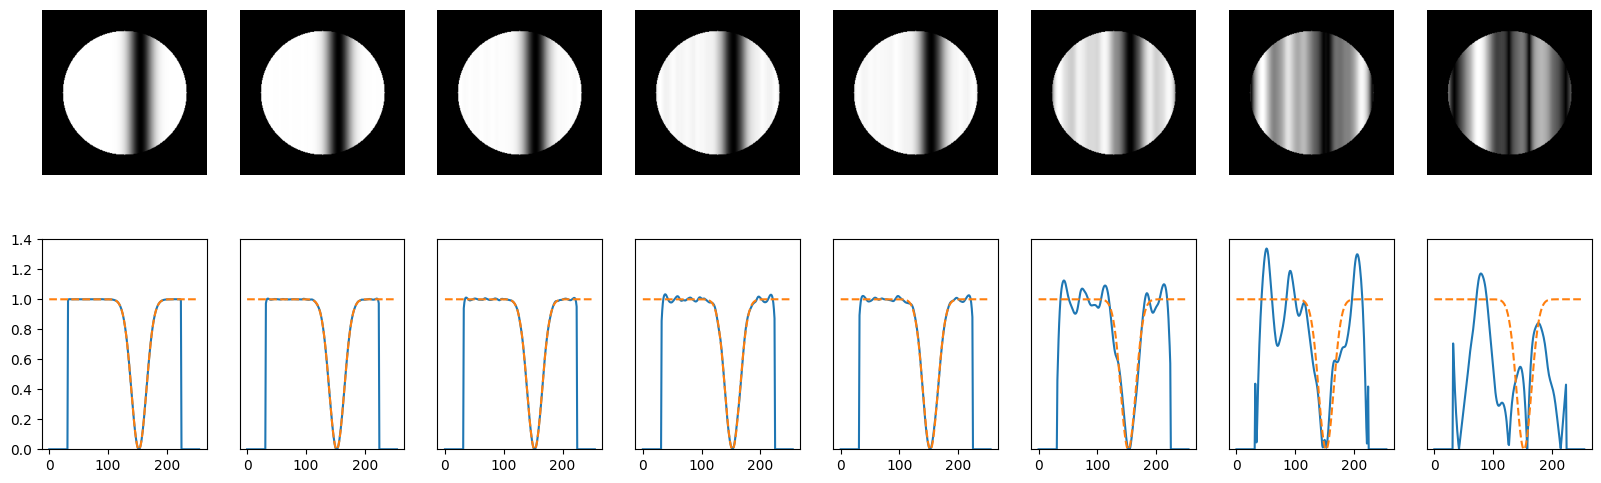

In [5]:
width = 256
height = 256
npcs = 16
alpha = np.deg2rad(60)
gradient = 2 * np.pi
phantom_type = 'circle'
D = responses.notch(width, bw=0.2, shift=0.1)

P = [{ 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':14, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':12, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':10, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':8, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':6, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':4, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':2, 'TRs':[5e-3, 10e-3, 20e-3] }]

G = []
A = []
for p in P:
    M = simulation.simulate_ssfp(width=width, height=height, npcs=p['npcs'], TRs=p['TRs'], alpha = alpha, gradient = gradient, phantom_type=phantom_type)
    Ic, M, An = simulation.simulate_gasp(D, npcs=p['npcs'], TRs=p['TRs'], alpha = alpha, gradient = gradient, phantom_type=phantom_type)
    G.append(Ic)
    A.append(An)

D = [D, D, D, D, D, D, D, D]
view_gasp_comparison(G, D, ylim=1.4)

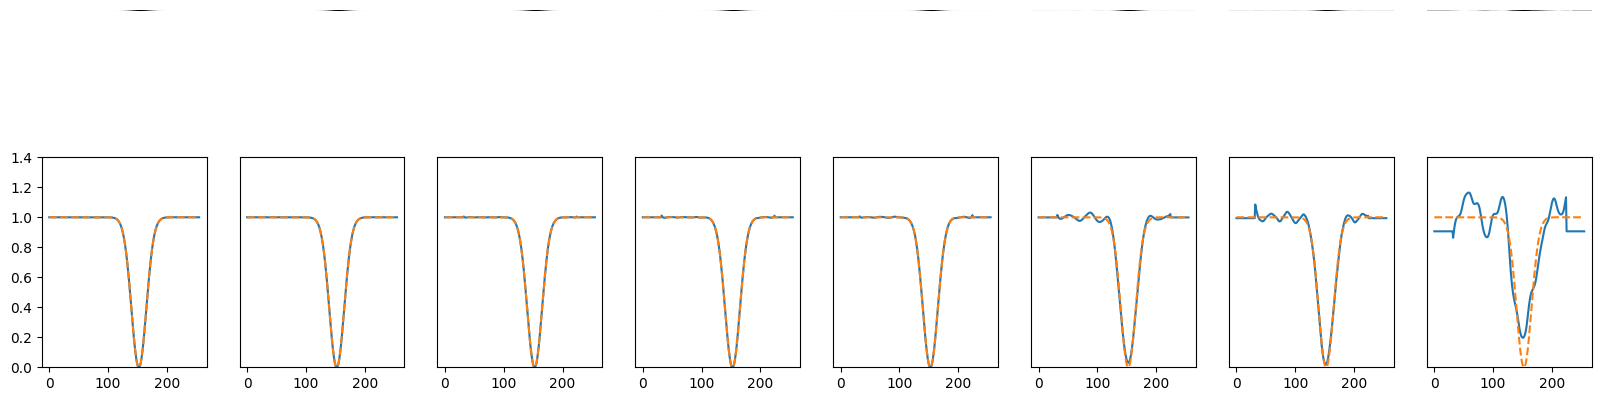

In [11]:

D = responses.notch(width, bw=0.2, shift=0.1)
P = [{ 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':14, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':12, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':10, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':8, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':6, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':4, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':2, 'TRs':[5e-3, 10e-3, 20e-3] }]

G = []
A = []
for p in P:
    M = simulation.simulate_ssfp(width=256, height=256, npcs=p['npcs'], TRs=p['TRs'], alpha = np.deg2rad(60), gradient = 2 * np.pi, phantom_type= 'circle')
    data = process_data_for_gasp(M, useMask=True)[0]
    Ic, An = train_gasp(data, D)
    G.append(Ic)
    A.append(An)

D = [D, D, D, D, D, D, D, D]
view_gasp_comparison(G, D, ylim=1.4)